In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [5]:
conn = sqlite3.connect('/Users/trsaivarun/Desktop/git_uploads/MachineLearning-DeepDive/Password_Strength_Predictor(NLP)/password_data.sqlite')

In [6]:
data = pd.read_sql_query('select * from Users',conn)

In [7]:
data.shape

(100000, 3)

In [280]:
data.head(4)

,password,strength,p_length,Freq_lower,Freq_upper,Freq_digit,Freq_special
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1


## data cleaning

In [9]:
data.dtypes

index        int64
password    object
strength     int64
dtype: object

In [10]:
data = data.drop('index',axis=1)

In [11]:
data.dtypes

password    object
strength     int64
dtype: object

In [12]:
data.isna().sum()

password    0
strength    0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data['strength'].unique()

array([1, 2, 0])

## data analysis - semantic analysis

1. How many are numeric only?
2. How many are uppercase only?
3. How many hold alphanumeric?
4. How many have title-case?
5. How many have some special characters?

In [15]:
data[data['password'].str.isnumeric()].count()

password    26
strength    26
dtype: int64

In [16]:
data[data['password'].str.isupper()].count()

password    1506
strength    1506
dtype: int64

In [17]:
data[data['password'].str.isalnum()].count()

password    97203
strength    97203
dtype: int64

In [18]:
data[data['password'].str.istitle()].count()

password    932
strength    932
dtype: int64

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def spl_checker(rows):
    for letter in rows:
        if letter in string.punctuation:
            return 1
        else:
             pass

In [21]:
data[data['password'].apply(spl_checker)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [22]:
data['p_length']=data['password'].str.len()

In [23]:
data.head()

,password,strength,p_length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


In [24]:
text = 'Shan99'
text

'Shan99'

In [25]:
mychar=[]
for letter in text:
    if letter.islower():
        mychar.append(letter)
mychar

['h', 'a', 'n']

In [26]:
len(mychar)

3

In [27]:
len(mychar)/len(text)

0.5

In [28]:

def freq_lower(text):
    mychar=[]
    for letter in text:
        if letter.islower():
            mychar.append(letter)
    return len(mychar)/len(text)

def freq_upper(text):
    mychar=[]
    for letter in text:
        if letter.isupper():
            mychar.append(letter)
    return len(mychar)/len(text)

def freq_digit(text):
    mychar=[]
    for letter in text:
        if letter.isdigit():
            mychar.append(letter)
    return len(mychar)/len(text)


def freq_special(text):
    mychar=[]
    for letter in text:
        if not letter.isalpha() and not letter.isdigit():
            mychar.append(letter)
    return len(mychar)



In [231]:
data['Freq_lower']=np.round(data['password'].apply(freq_lower),3)
data['Freq_upper']=np.round(data['password'].apply(freq_upper),3)
data['Freq_digit']=np.round(data['password'].apply(freq_digit),3)
data['Freq_special']=np.round(data['password'].apply(freq_special),3)

In [282]:
data["Freq_special"] = data["Freq_special"]/data["p_length"]

In [283]:
data.head()

,password,strength,p_length,Freq_lower,Freq_upper,Freq_digit,Freq_special
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [284]:
data[['p_length','strength']].groupby('strength').agg(['min','max','mean','median'])



p_length                       
              min  max       mean median
strength                                
0               1    7   6.550947    7.0
1               8   13   9.611074    9.0
2              14  220  15.953421   16.0

In [285]:
data.columns

Index(['password', 'strength', 'p_length', 'Freq_lower', 'Freq_upper',
       'Freq_digit', 'Freq_special'],
      dtype='object')

In [286]:
cols=[ 'p_length' ,'Freq_lower', 'Freq_upper',
       'Freq_digit', 'Freq_special']

for col in cols:
    print(data[[col, 'strength']].groupby('strength').agg(['min', 'max', 'mean', 'median']))


         p_length                       
              min  max       mean median
strength                                
0               1    7   6.550947    7.0
1               8   13   9.611074    9.0
2              14  220  15.953421   16.0
         Freq_lower                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.708050  0.714
1               0.0  0.923  0.630067  0.667
2               0.0  0.917  0.424679  0.400
         Freq_upper                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.012872  0.000
1               0.0  0.923  0.007915  0.000
2               0.0  0.889  0.367633  0.429
         Freq_digit                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.275383  0.286
1               0.0  0.923  0.360123  0.333
2     

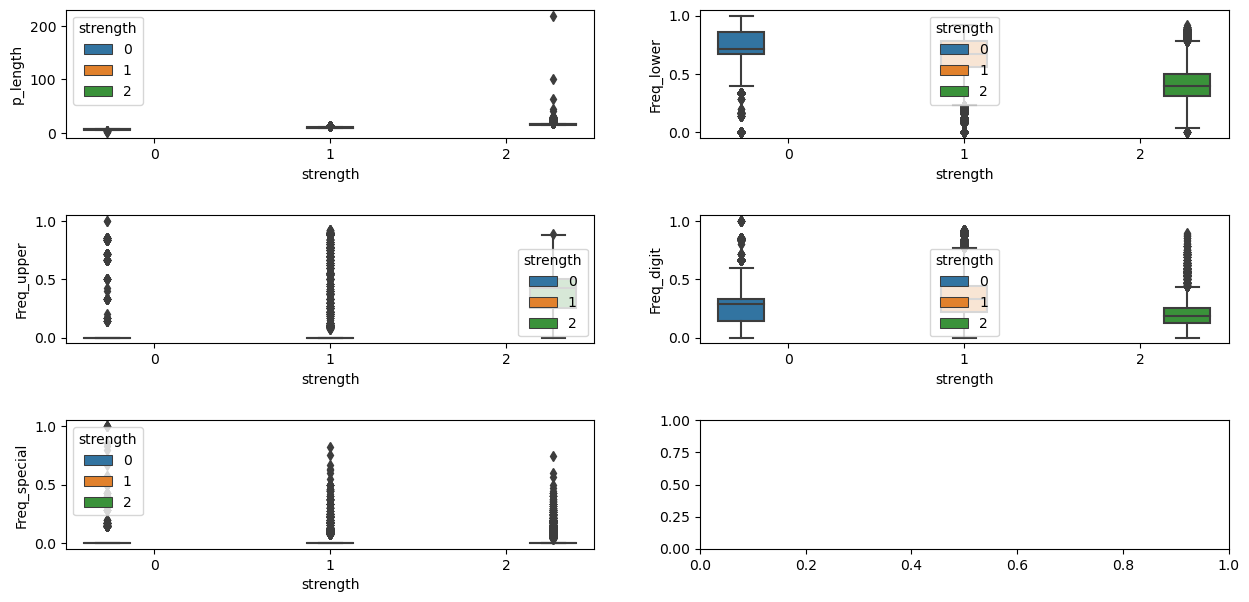

In [287]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='p_length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='Freq_lower' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='Freq_upper' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='Freq_digit' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='Freq_special' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

## univariate analysis wrt strength vs freq_lower

In [288]:
def get_plot(data,feature):
    
    plt.figure(figsize=(10,8))

    plt.subplot(1,2,1)
    sns.violinplot(x='strength',y=feature,data=data)
    
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature], color='red',label='0',hist=False)
    sns.distplot(data[data['strength']==1][feature], color='green',label='1',hist=False)
    sns.distplot(data[data['strength']==2][feature], color='blue',label='2',hist=False)
    plt.legend()
    plt.show()

In [289]:
from warnings import filterwarnings
filterwarnings('ignore')

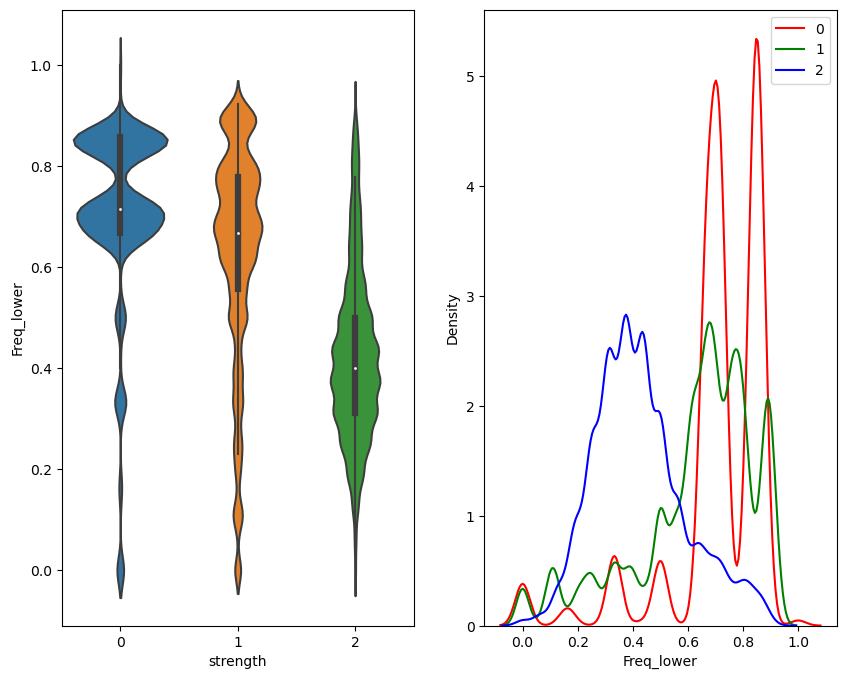

In [290]:
get_plot(data,'Freq_lower')

In [291]:
# that means for lower case frequency , length of password might be effective for password strength

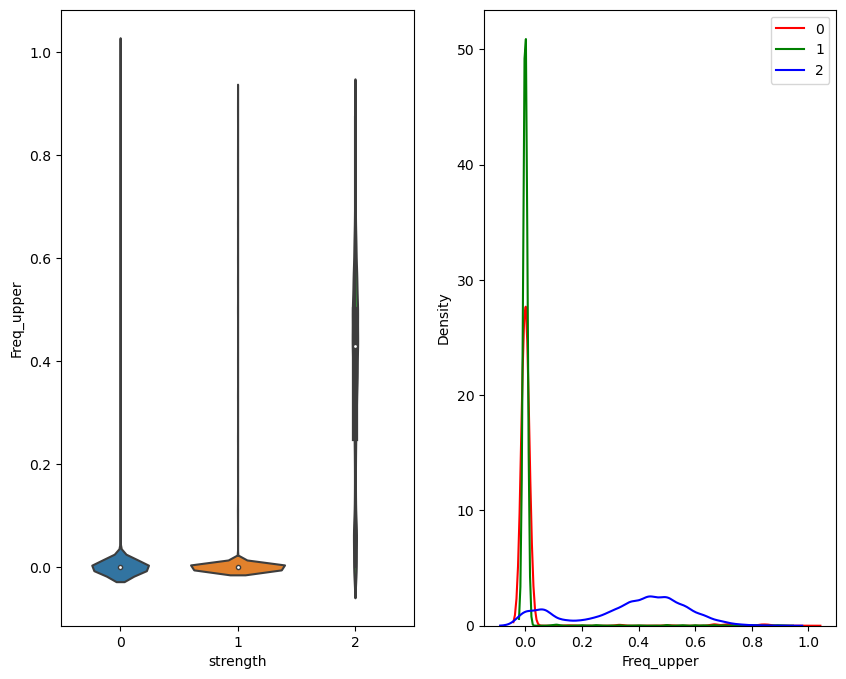

In [292]:
get_plot(data,'Freq_upper')

In [293]:
data.columns

Index(['password', 'strength', 'p_length', 'Freq_lower', 'Freq_upper',
       'Freq_digit', 'Freq_special'],
      dtype='object')

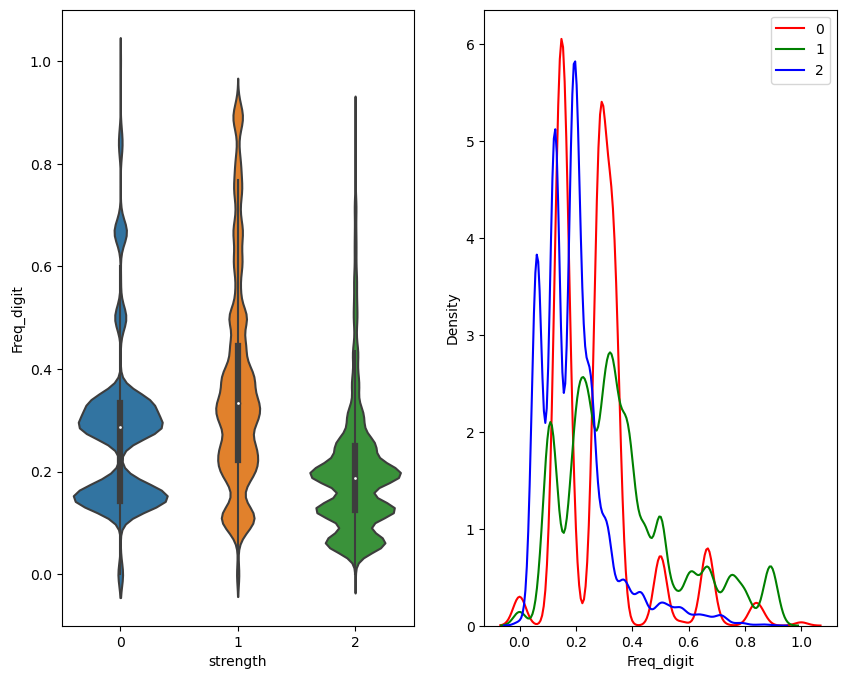

In [294]:
get_plot(data,'Freq_digit')

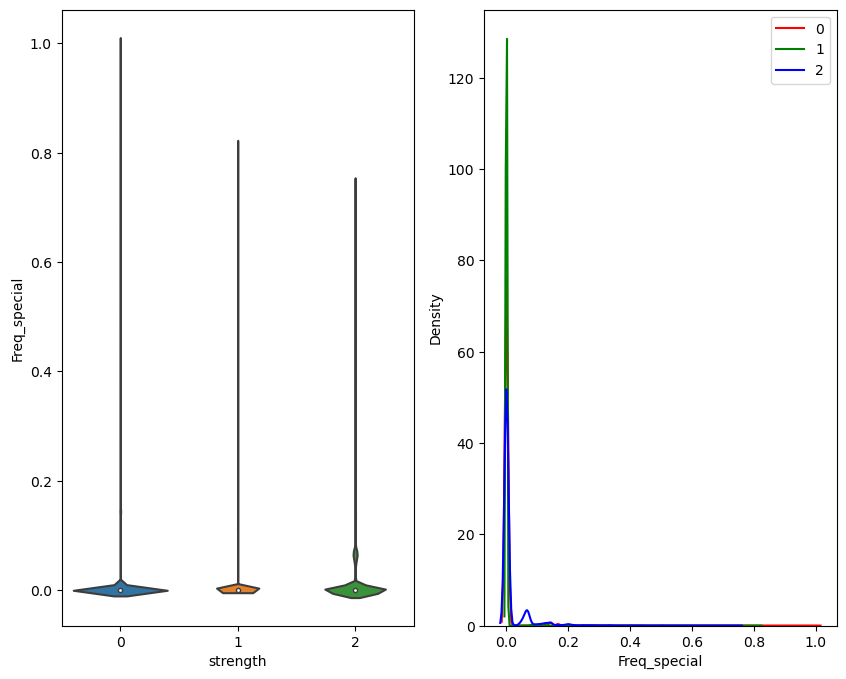

In [295]:
get_plot(data,'Freq_special')

### from all data analysis we concluded that password is strong when length feature is high and it is high in case of lowercase letter (lower_freq)

## feature engineering -TF-IDF

In [331]:
data.head(4)

,password,strength,p_length,Freq_lower,Freq_upper,Freq_digit,Freq_special
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [367]:
df=data.sample(frac=1)

In [368]:
df

,password,strength,p_length,Freq_lower,Freq_upper,Freq_digit,Freq_special
20143,fbjrqoe10,1,9,0.778,0.0,0.222,0.00
26503,camuf195,1,8,0.625,0.0,0.375,0.00
48357,stella30,1,8,0.750,0.0,0.250,0.00
75260,walkie0689,1,10,0.600,0.0,0.400,0.00
84771,120799*#,1,8,0.000,0.0,0.750,0.25
...,...,...,...,...,...,...,...
96455,193657ehn,1,9,0.333,0.0,0.667,0.00
70479,langkah2012,1,11,0.636,0.0,0.364,0.00
48756,biffme7,0,7,0.857,0.0,0.143,0.00
28850,isabella24,1,10,0.800,0.0,0.200,0.00


In [369]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [370]:
vectorizor = TfidfVectorizer(analyzer='char')

In [371]:
x = list(df['password'])

In [372]:
df["password"].shape

(100000,)

In [373]:
X = vectorizor.fit_transform(x)

In [374]:
X.shape

(100000, 99)

In [375]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [376]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30028941, 0.23037655, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.37192297, 0.        ,
       0.        , 0.25990028, 0.40549532, 0.        , 0.        ,
       0.        , 0.38496271, 0.        , 0.        , 0.        ,
       0.        , 0.27261531, 0.        , 0.42023347, 0.29553351,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [377]:
vectorizor.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [378]:
df2 = pd.DataFrame(X.toarray(),columns=vectorizor.get_feature_names_out())

In [379]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.610418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [380]:
df2['p_length'] = df['p_length']
df2['Freq_lower'] = df['Freq_lower']

In [381]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,p_length,Freq_lower
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.610418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [382]:
len(vectorizor.get_feature_names_out())

99

In [383]:
y = df['strength']

In [384]:
y.head()

20143    1
26503    1
48357    1
75260    1
84771    1
Name: strength, dtype: int64

In [385]:
df['strength'].unique()

array([1, 2, 0])

In [386]:
from sklearn.model_selection import train_test_split

In [387]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [388]:
X_train.shape

(80000, 101)

In [389]:
y_train.shape

(80000,)

In [390]:
from sklearn.linear_model import LogisticRegression

In [391]:
log_model = LogisticRegression(multi_class='multinomial')

In [392]:
log_model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [393]:
predictions = log_model.predict(X_test)

In [394]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [395]:
X_test.shape

(20000, 101)

In [396]:
from collections import Counter
Counter(predictions)

Counter({1: 16962, 2: 1771, 0: 1267})

In [397]:


# Assuming y_train contains the true labels of the training data
print(Counter(y_train))


Counter({1: 59104, 0: 10937, 2: 9959})


In [398]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [399]:
accuracy_score(y_test,predictions)

0.79965

In [400]:
confusion_matrix(y_test,predictions)

array([[  662,  2017,     6],
       [  533, 13906,   340],
       [   72,  1039,  1425]])

In [401]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.52      0.25      0.34      2685
           1       0.82      0.94      0.88     14779
           2       0.80      0.56      0.66      2536

    accuracy                           0.80     20000
   macro avg       0.72      0.58      0.62     20000
weighted avg       0.78      0.80      0.78     20000



## prediction

In [402]:
X_train

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,p_length,Freq_lower
2902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.600
78025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.714
46079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
58937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
38552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,0.636
35729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667
70407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.400
51238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.000


In [404]:
X_train.shape

(80000, 101)

In [405]:
password = '@%123abc'

In [406]:
sample = np.array([password])

In [408]:
sample_matrix = vectorizor.transform(sample)

In [409]:
sample_matrix.toarray() # now it know tf and idf

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.73506742, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14665565, 0.16967348, 0.19003504, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.49832138, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14123466, 0.23676284, 0.22121828,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [410]:
sample_matrix.shape #now we need to convert (1,101) by adding p_length, freq_lower

(1, 99)

In [417]:
len(password)

8

In [416]:
mychar=[]
for char in password:
    if char.islower():
        mychar.append(char)
len(mychar)/len(password)

0.375

In [419]:
new_matrix=np.append(sample_matrix.toarray(),(0.375,8)).reshape(1,101)

In [420]:
new_matrix.shape

(1, 101)

In [421]:
log_model.predict(new_matrix)

array([0])

In [422]:
# 0 means weak password

In [423]:
# trying to automate

In [425]:
def predict():
    password = input('Enter password: ')
    sample = np.array([password])
    sample_matrix = vectorizor.transform(sample)
    length=len(password)
    length_normpass = len([char for char in password if char.lower()])/len(password)
    new_matrix=np.append(sample_matrix.toarray(),(length_normpass,length)).reshape(1,101)
    
    result = log_model.predict(new_matrix)
    
    if result == 0:
        return 'weak password'
    elif result == 1:
        return 'medium strength password'
    else:
        return 'strong password'
    
    

In [429]:
predict()

Enter password: 12ggg%4


'weak password'